In [165]:
from pathlib import Path
import subprocess
import shlex
import os
import shutil
import pandas as pd
import numpy as np
import fileinput
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import lognorm

In [167]:
# Import the column database and convert all section sizes to a list
column_dataframe = pd.read_csv("ColumnDatabase.csv")
section_size_series = column_dataframe['section size']
section_size_list = section_size_series.tolist()

## For calculating fragility based on groups:
# group_size = 10
# grouped_list = [section_size_list[i:i + group_size] for i in range(0, len(section_size_list), group_size)]

## Indicate a specific group of section sizes of interest
# specifc_group_index = 1  # vary this as the next groups of columns are looped over
# specific_group = grouped_list[specific_group_index]
# print(specific_group)

In [169]:
print(os.getcwd())

/Users/emilynakamura/Downloads/NHERI/Technical/REU2024/src/fragility/database


In [175]:
# Clear database
database = database[0:0]

# Initialize the dataframe for recording the fitted parameters
column_headers = ["section_size", "eccentricity", "length", "DCR", "median", "log_standard_deviation"]
database = pd.DataFrame(columns=column_headers)
i = 0

# Open the results file for each section size
for section_size in section_size_list: # specific_group:
    file_name = f"results_{section_size}.csv"
    file_path = f"results/{file_name}"
    column_results_dataframe = pd.read_csv(file_path)
    
    for column in column_results_dataframe.columns[1:]:  # Skip the first column (fire_load)
        x = column_results_dataframe['fire_load'].tolist()
        y = column_results_dataframe[column].tolist()
        parameters = column.split('_')
    
        section_size = parameters[0]
        e = float(parameters[1])
        L = int(parameters[2])
        DCR = float(parameters[3])
        # print(i, e, L, DCR)
        i = i + 1
            
        if (column_results_dataframe[column] == 0).all():  # Check if all values are 0
            column_results_dataframe[column] = np.nan  # Replace all values with np.nan
            shape_fit = "-"
            scale_fit = "-"
                    
        elif (column_results_dataframe[column] != 0).any():
            def model_function(x, shape, loc, scale):
                return lognorm.cdf(x, s=shape, loc=loc, scale=scale)
            # Prepare your data
            IM_values = x
            PF_values = y
            # Set bounds for the parameters
            # shape > 0, loc >= 0, scale > 0
            bounds = ([0, 0, 0], [np.inf, 1e-6, np.inf])
            # Use curve_fit to fit the model to your data
            popt, pcov = curve_fit(model_function, IM_values, PF_values, bounds=bounds) 
            # print("Optimal parameters:", popt)
            ## popt contains the best fit parameters shape, loc, and scale
            shape_fit, loc_fit, scale_fit = popt
        
        new_data = pd.DataFrame({
            "section_size": [section_size],
            "eccentricity": [e],
            "length": [L],
            "DCR": [DCR],
            "median": [scale_fit],
            "log_standard_deviation": [shape_fit]
        })
        database = pd.concat([database, new_data], ignore_index=True)
        
print(database)

0 0.0 1 0.95
1 0.0 1 0.85
2 0.0 1 0.75
3 0.0 1 0.5
4 0.0 1 0.25
5 0.0 1 0.15
6 0.0 1 0.05
7 0.0 1 0.95
8 0.0 1 0.85
9 0.0 1 0.75
10 0.0 1 0.5
11 0.0 1 0.25
12 0.0 1 0.15
13 0.0 1 0.05
14 0.0 1 0.95
15 0.0 1 0.85
16 0.0 1 0.75
17 0.0 1 0.5
18 0.0 1 0.25
19 0.0 1 0.15
20 0.0 1 0.05
21 0.0 1 0.95
22 0.0 1 0.85
23 0.0 1 0.75
24 0.0 1 0.5
25 0.0 1 0.25
26 0.0 1 0.15
27 0.0 1 0.05
28 0.0 1 0.95
29 0.0 1 0.85
30 0.0 1 0.75
31 0.0 1 0.5
32 0.0 1 0.25
33 0.0 1 0.15
34 0.0 1 0.05
35 0.0 1 0.95
36 0.0 1 0.85
37 0.0 1 0.75
38 0.0 1 0.5
39 0.0 1 0.25
40 0.0 1 0.15
41 0.0 1 0.05
42 0.0 1 0.95
43 0.0 1 0.85
44 0.0 1 0.75
45 0.0 1 0.5
46 0.0 1 0.25
47 0.0 1 0.15
48 0.0 1 0.05
49 0.0 1 0.95
50 0.0 1 0.85
51 0.0 1 0.75
52 0.0 1 0.5
53 0.0 1 0.25
54 0.0 1 0.15
55 0.0 1 0.05
56 0.0 1 0.95
57 0.0 1 0.85
58 0.0 1 0.75
59 0.0 1 0.5
60 0.0 1 0.25
61 0.0 1 0.15
62 0.0 1 0.05
63 0.0 1 0.95
64 0.0 1 0.85
65 0.0 1 0.75
66 0.0 1 0.5
67 0.0 1 0.25
68 0.0 1 0.15
69 0.0 1 0.05
70 0.0 1 0.95
71 0.0 1 0.85
72 0.0 1 0.7

In [177]:
file_path = 'FragilityResults.csv' 
database.to_csv(file_path, index=False)

In [185]:
# Example: access the median of the 0th fragility database results entry
print(database.loc[0, 'median'])

1933.4496643264185


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected 

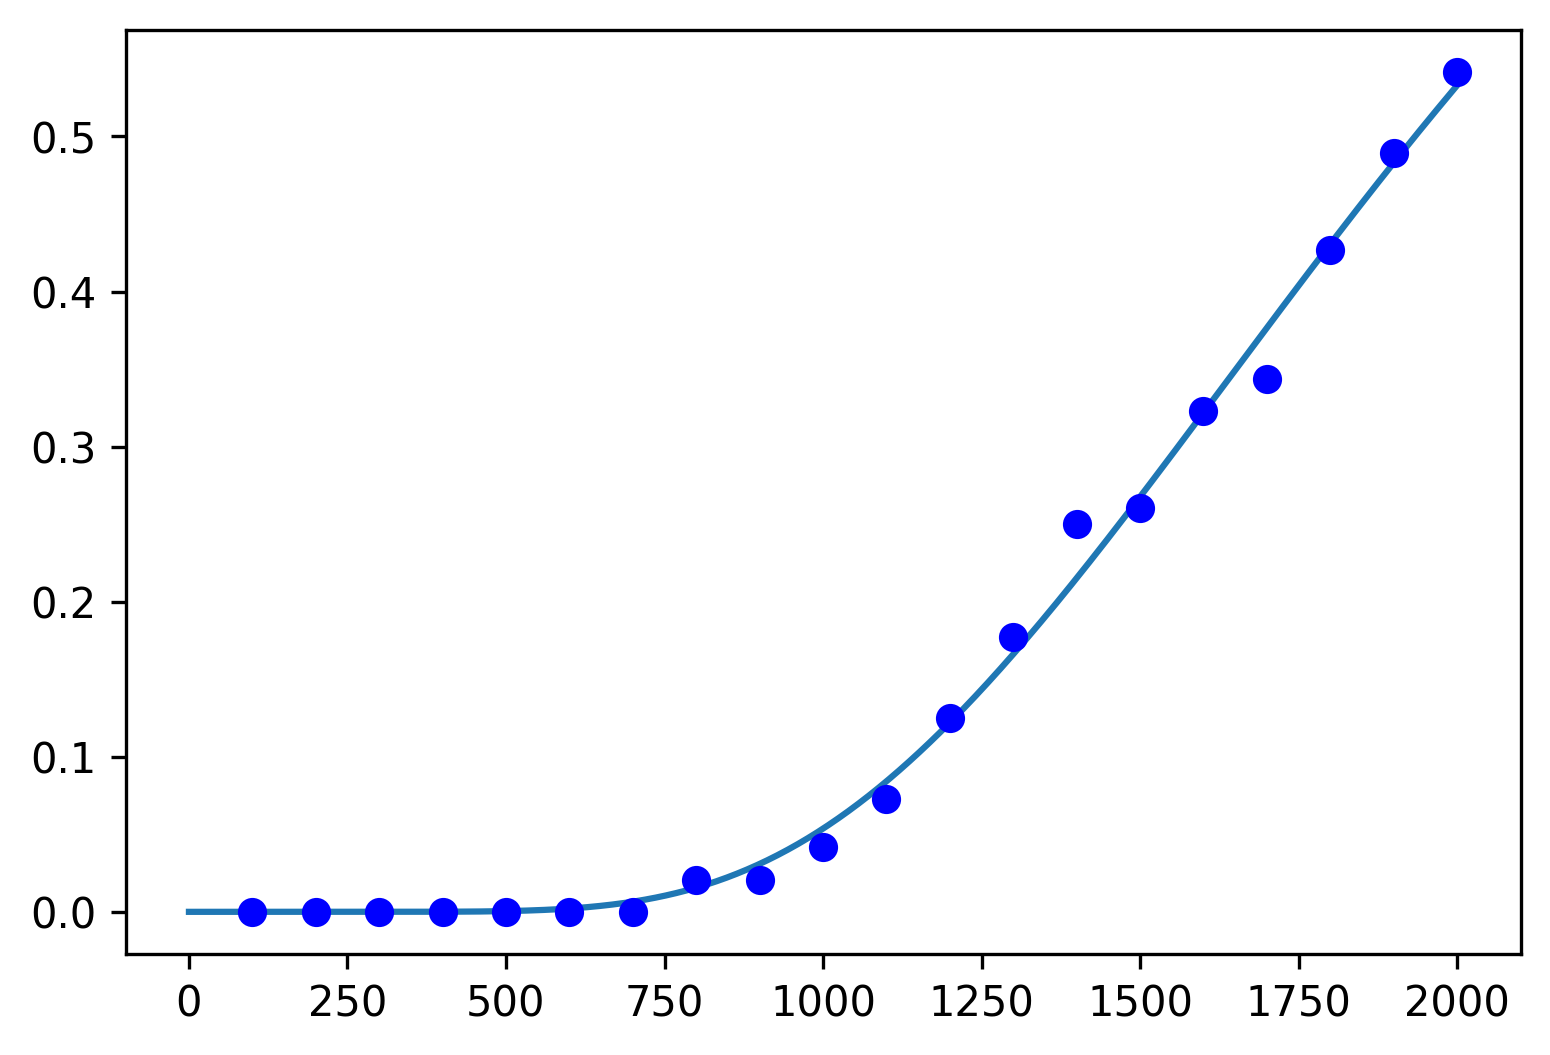

In [191]:
# Indicate the row number
i = 0

section_size = database.loc[i, 'section_size']
e = database.loc[i, 'eccentricity']
L = database.loc[i, 'length']
DCR = database.loc[i, 'DCR']

file_name = f"results_{section_size}.csv"
file_path = f"results/{file_name}"
column_results_dataframe = pd.read_csv(file_path)
    
for column in column_results_dataframe.columns[1:]:  # Skip the first column (fire_load)
    IM_values = column_results_dataframe['fire_load'].tolist()
    PF_values = column_results_dataframe[f"{section_size}_{e:.3f}_{L}_{DCR:.2f}"].tolist()

x1 = np.linspace(0, 2000, 501)
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(IM_values, PF_values, label='Data', color='blue', zorder=20)
plt.plot(x1, model_function(x1, database.loc[i, 'log_standard_deviation'], 0, database.loc[i, 'median'])) #, label=f'Fitted Curve (Lognormal)\nMedian = {int(database.loc[i, 'median']):d}, Beta = {database.loc[i, 'log_standard_deviation']:.3g}', color='red', zorder=10)
plt.show()

In [87]:
# Specify a section size of interest
specific_section_size = 'W36X652'
specific_eccentricity = 0.0
specific_length = 21
specific_DCR = 0.5

# Filter the database DataFrame for specific parameters
filtered_database = database[
    (database['section_size'] == specific_section_size) &
    (database['eccentricity'] == specific_eccentricity) &
    (database['length'] == specific_length) &
    (database['DCR'] == specific_DCR) 
]

varying_parameter = ''

# Plot the MEDIAN for a varying parameter
plt.figure(figsize=(10, 6))
plt.plot(filtered_database[varying_parameter], filtered_database['median'], marker='o', linestyle='-', color='b')
plt.xlabel(varying_parameter)
plt.ylabel('Median')
plt.title(f'Median vs Length for Section Size {specific_section_size}, DCR {specific_DCR}, and Eccentricity {specific_eccentricity}')
plt.grid(True)
plt.show()

# Plot the LOG STANDARD DEVIATION for a varying parameter
plt.figure(figsize=(10, 6))
plt.plot(filtered_database[varying_parameter], filtered_database['log_standard_deviation'], marker='o', linestyle='-', color='b')
plt.xlabel(varying_parameter)
plt.ylabel('Log Standard Deviation')
plt.title(f'Median vs Length for Section Size {specific_section_size}, DCR {specific_DCR}, and Eccentricity {specific_eccentricity}')
plt.grid(True)
plt.show()

KeyError: ''

<Figure size 1000x600 with 0 Axes>

In [99]:
def get_median_and_log_std(df, section_size=None, eccentricity=None, length=None, DCR=None):
    
    # Define the filtering criteria
    filters = {
        'section_size': section_size,
        'eccentricity': eccentricity,
        'length': length,
        'DCR': DCR
    }
    
    # Remove None values from filters
    filter_conditions = {k: v for k, v in filters.items() if v is not None}
    
    # Filter the DataFrame
    filtered_df = df.copy()
    for param, value in filter_conditions.items():
        filtered_df = filtered_df[filtered_df[param] == value]
    
    # Check if the filtered DataFrame is empty
    if filtered_df.empty:
        print("No data found for the specified parameters.")
        return None
    
    # Select and return the median and log standard deviation columns
    return filtered_df[['median', 'log_standard_deviation']].reset_index(drop=True)

In [101]:
data = get_median_and_log_std(database, section_size='W36X652', DCR=0.95, eccentricity=0.000)
print(data)

No data found for the specified parameters.
None


In [95]:
def plot_lognormal_distributions(df, section_size=None, eccentricity=None, length=None, DCR=None):
    """
    Plot lognormal distributions based on median and log standard deviation for given parameters.
    """
    # Get the median and log standard deviation values
    data = get_median_and_log_std(df, section_size, eccentricity, length, DCR)
    
    if data is None:
        return
    
    # Set up the plot
    plt.figure(figsize=(12, 8))
    
    # Extract median and beta values
    for _, row in data.iterrows():
        median = row['median']
        beta = row['log_standard_deviation']
        
        # Define the lognormal distribution
        sigma = beta
        mu = np.log(median)
        x = np.linspace(0, 2 * median, 1000)
        pdf = lognorm.pdf(x, sigma, scale=np.exp(mu))
        
        # Plot
        plt.plot(x, pdf, label=f'Median={median}, Beta={beta}')
    
    # Add labels, title, and legend
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title('Lognormal Distributions')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Show plot
    plt.show()

In [97]:
plot_lognormal_distributions(database, section_size='W36X652', DCR=0.95, eccentricity=0.000)

No data found for the specified parameters.


In [125]:
# NOT USING:

# Clear database
#database = database[0:0]

# List the eccentricities, lengths, and DCR values looped over in the fragility data generation
e_list = [0.0]
L_list = [29, 25, 21, 17, 13, 9]
DCR_list = [0.95, 0.85, 0.75, 0.5, 0.25, 0.15, 0.05]

# Initialize the dataframe for recording the fitted parameters
column_headers = ["section_size", "eccentricity", "length", "DCR", "median", "log_standard_deviation"]
database = pd.DataFrame(columns=column_headers)

# Open the results file for each section size
for section_size in section_size_list: # specific_group:
    file_name = f"results_{section_size}.csv"
    file_path = f"results/{file_name}"
    column_results_dataframe = pd.read_csv(file_path)
    for e in e_list:
        for L in L_list:
            for DCR in DCR_list:
                fire_load_list = column_results_dataframe['fire_load'].tolist()
                pf_list = column_results_dataframe[f"{section_size}_{e:.3f}_{L}_{DCR:.2f}"].tolist()
                # Fit the fragility data
                def model_function(x, shape, loc, scale):
                    return lognorm.cdf(x, s=shape, loc=loc, scale=scale)
                # Prepare your data
                IM_values = fire_load_list
                PF_values = pf_list
                # Set bounds for the parameters
                # shape > 0, loc >= 0, scale > 0
                bounds = ([0, 0, 0], [np.inf, 1e-6, np.inf])
                # Use curve_fit to fit the model to your data
                popt, pcov = curve_fit(model_function, IM_values, PF_values, bounds=bounds) 
                # print("Optimal parameters:", popt)
                ## popt contains the best fit parameters shape, loc, and scale
                shape_fit, loc_fit, scale_fit = popt
                new_data = pd.DataFrame({
                    "section_size": [section_size],
                    "eccentricity": [f"{e:.3f}"],
                    "length": [L],
                    "DCR": [f"{DCR:.2f}"],
                    "median": [f"{scale_fit:.3f}"],
                    "log_standard_deviation": [f"{shape_fit:.3f}"]
                })
                database = pd.concat([database, new_data], ignore_index=True)
print(database)

KeyError: 'W36X652_0.000_29_0.95'